Final Inertia (SSE): 1418.28
Silhouette Score: 0.412


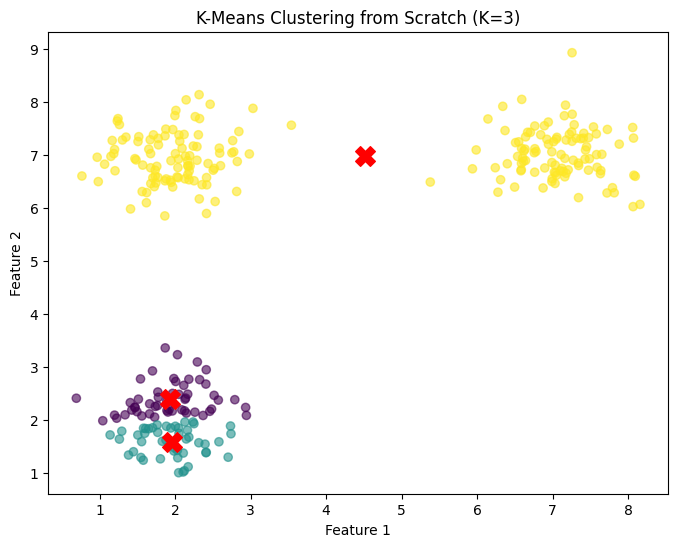

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

np.random.seed(42)

# Generate 3 clusters
cluster_1 = np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2))
cluster_2 = np.random.normal(loc=[7, 7], scale=0.5, size=(100, 2))
cluster_3 = np.random.normal(loc=[2, 7], scale=0.5, size=(100, 2))

X = np.vstack((cluster_1, cluster_2, cluster_3))


def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:
            new_centroids.append(X[np.random.randint(0, len(X))])
        else:
            new_centroids.append(cluster_points.mean(axis=0))
    return np.array(new_centroids)

def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
            
        centroids = new_centroids
        
    return centroids, labels

K = 3
centroids, labels = kmeans(X, K)

def calculate_inertia(X, centroids, labels):
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroids[i]) ** 2)
    return inertia

inertia = calculate_inertia(X, centroids, labels)
print("Final Inertia (SSE):", round(inertia, 2))


sil_score = silhouette_score(X, labels)
print("Silhouette Score:", round(sil_score, 3))


plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=200)
plt.title("K-Means Clustering from Scratch (K=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
